In [1]:
#Q1
import keras
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


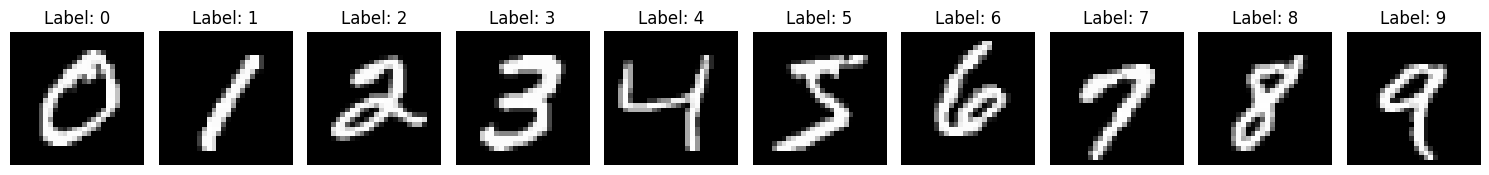

In [2]:
#Q2

import matplotlib.pyplot as plt
import numpy as np

label_indices = {}

for i, label in enumerate(y_train):
    if label not in label_indices:
        label_indices[label] = i

fig, axs = plt.subplots(1, len(label_indices), figsize=(15, 3))

for label, index in label_indices.items():
    image = x_train[index]
    axs[label].imshow(image, cmap='gray')
    axs[label].set_title(f'Label: {label}')
    axs[label].axis('off')

plt.tight_layout()
plt.show()


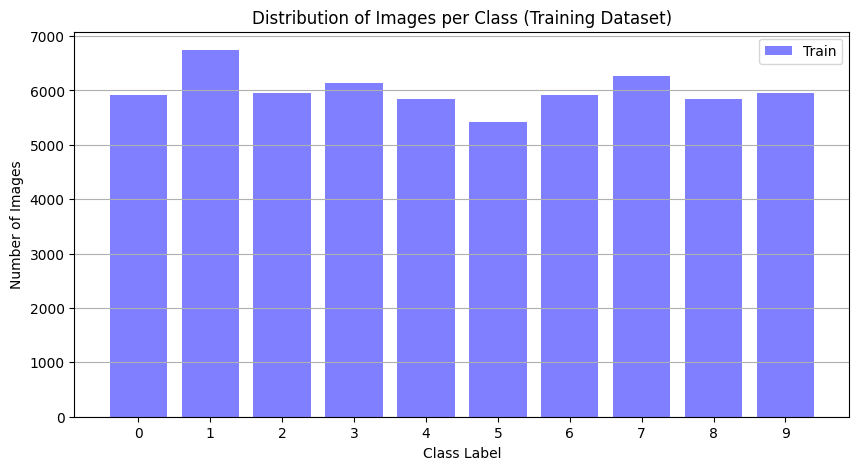

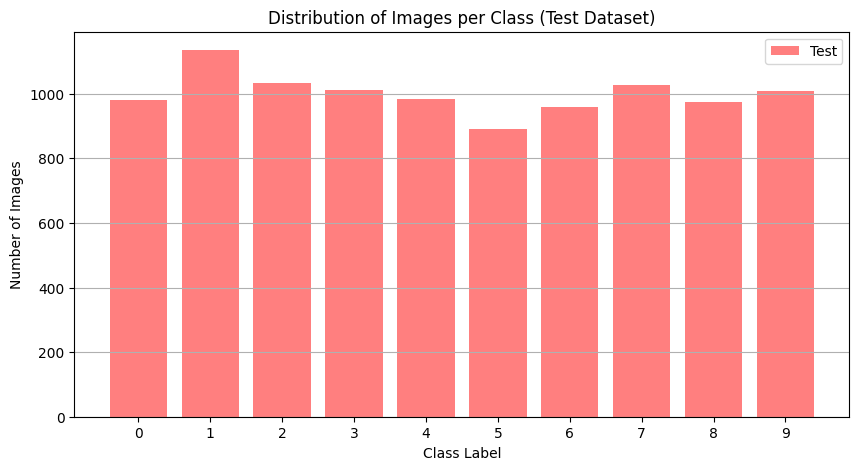

In [3]:
#Q3
unique_labels_train, label_counts_train = np.unique(y_train, return_counts=True)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(unique_labels_train, label_counts_train, color='blue', alpha=0.5, label='Train')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class (Training Dataset)')
plt.xticks(unique_labels_train)
plt.grid(axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(unique_labels_test, label_counts_test, color='red', alpha=0.5, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class (Test Dataset)')
plt.xticks(unique_labels_test)
plt.grid(axis='y')
plt.legend()
plt.show()

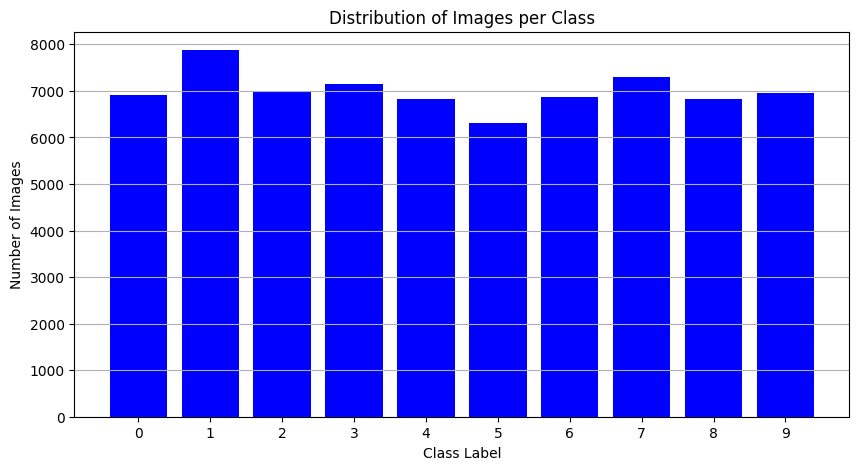

In [4]:
#Q3
all_labels = np.concatenate([y_train, y_test])

unique_labels, label_counts = np.unique(all_labels, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(unique_labels, label_counts, color='blue')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(unique_labels)
plt.grid(axis='y')
plt.show()

In [5]:

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_train_scaled = (x_train_flat - np.min(x_train_flat)) / (np.max(x_train_flat) - np.min(x_train_flat))
x_test_scaled = (x_test_flat - np.min(x_test_flat)) / (np.max(x_test_flat) - np.min(x_test_flat))

print("Minimum pixel value in scaled training data:", np.min(x_train_scaled))
print("Maximum pixel value in scaled training data:", np.max(x_train_scaled))
print("Minimum pixel value in scaled test data:", np.min(x_test_scaled))
print("Maximum pixel value in scaled test data:", np.max(x_test_scaled))

Minimum pixel value in scaled training data: 0.0
Maximum pixel value in scaled training data: 1.0
Minimum pixel value in scaled test data: 0.0
Maximum pixel value in scaled test data: 1.0


In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

loss_object = SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(learning_rate=6e-5),
              loss=loss_object,
              metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=25, validation_data=(x_test_scaled, y_test))

Epoch 1/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5120 - accuracy: 0.8732 - val_loss: 0.2380 - val_accuracy: 0.9352
Epoch 2/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2022 - accuracy: 0.9442 - val_loss: 0.1713 - val_accuracy: 0.9507
Epoch 3/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1523 - accuracy: 0.9569 - val_loss: 0.1393 - val_accuracy: 0.9601
Epoch 4/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1221 - accuracy: 0.9658 - val_loss: 0.1225 - val_accuracy: 0.9637
Epoch 5/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1023 - accuracy: 0.9709 - val_loss: 0.1125 - val_accuracy: 0.9660
Epoch 6/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0859 - accuracy: 0.9758 - val_loss: 0.0939 - val_accuracy: 0.9708
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0730 - accuracy: 0.9799 - val_loss: 0.0900 - val_ac

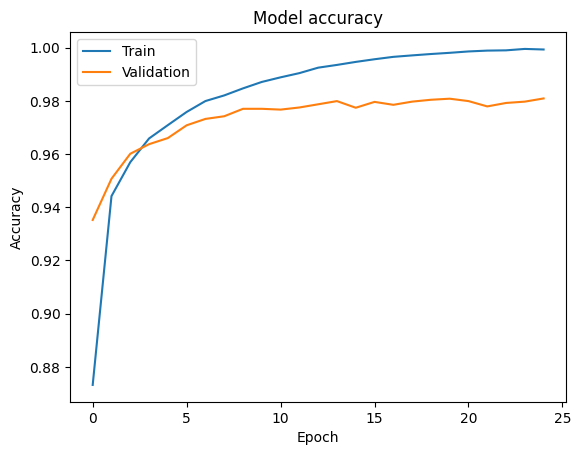

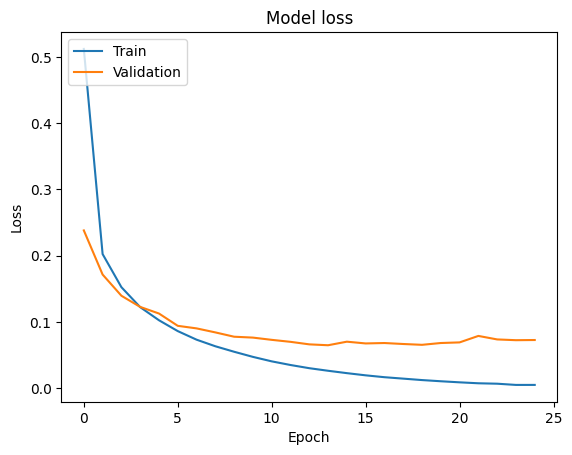

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


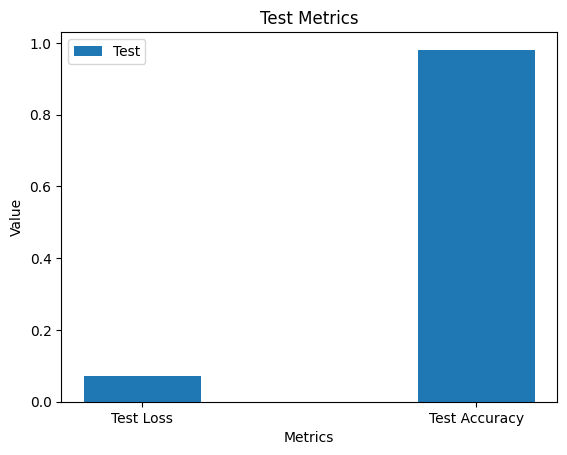

In [10]:

fig, ax = plt.subplots()
bar_width = 0.35

labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_acc]

ax.bar(labels, values, bar_width, label='Test')

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Test Metrics')
ax.legend()

plt.show()

In [54]:

predictions = model.predict(x_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)

correctly_classified_indices = np.where(predicted_labels == y_test)[0]
print(len(correctly_classified_indices))

313/313 [==============================] - 1s 4ms/step
9809


In [27]:
selected_indices = []
listofdigits = []
for x in correctly_classified_indices:
  digit = y_test[x]
  if digit not in listofdigits:
    listofdigits.append(digit)
    selected_indices.append(x)


In [13]:
import tensorflow as tf
def FGSM(model, image, label, eps):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = model(image)
        loss = loss_object(label, pred)
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    adversary = (image + (signed_grad * eps)).numpy()
    
    return adversary


In [62]:

eps = 0.5  
adversarial_images = []
for index in selected_indices:
    image = x_test_scaled[index]
    label = y_test[index]
    image = image.reshape(1, -1)
    perturbed_image = FGSM(model, image, label, eps)
    adversarial_images.append(perturbed_image)


In [47]:
eps = 0.5 
adversarial_images_all = []
for index in correctly_classified_indices:
    image = x_test_scaled[index]
    label = y_test[index]
    image = image.reshape(1, -1)
    perturbed_image = FGSM(model, image, label, eps)
    adversarial_images_all.append(perturbed_image)

original_images = x_test_scaled[correctly_classified_indices].reshape(-1, 28, 28)
perturbed_images = np.array(adversarial_images_all)
true_labels = y_test[correctly_classified_indices]
perturbed_predictions = model.predict(perturbed_images.reshape(-1, 784))
pred_labels = np.argmax(perturbed_predictions, axis=1)

307/307 [==============================] - 1s 2ms/step


In [48]:

wrongly_classified_count = 0
correctly_classified_count = 0

for true_label, pred_label in zip(true_labels, pred_labels):
    if true_label != pred_label:
        wrongly_classified_count += 1
    else:
        correctly_classified_count += 1

wrongly_classified_rate = wrongly_classified_count / len(true_labels)
correctly_classified_rate = correctly_classified_count / len(true_labels)

print("Rate of wrongly classified images:", wrongly_classified_rate)
print("Rate of correctly classified images:", correctly_classified_rate)


Rate of wrongly classified images: 0.9903150168212865
Rate of correctly classified images: 0.009684983178713427


1/1 [==============================] - 0s 23ms/step


<Figure size 1500x5000 with 0 Axes>

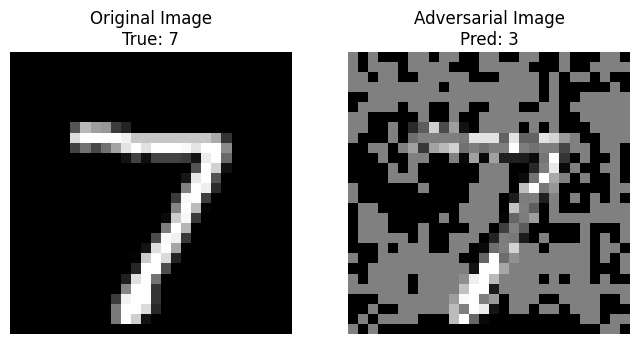

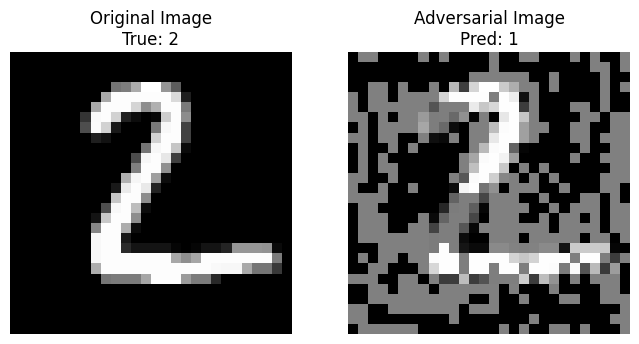

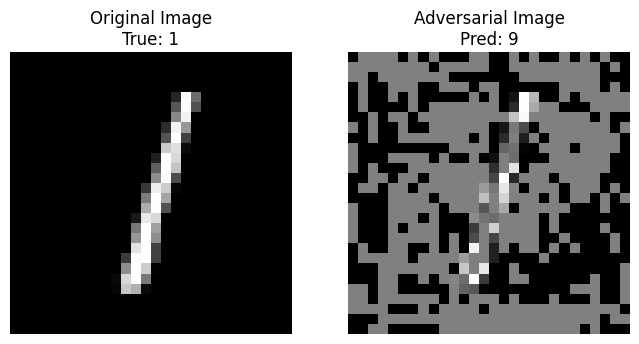

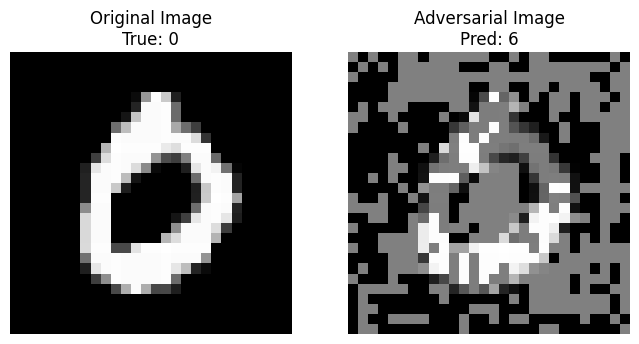

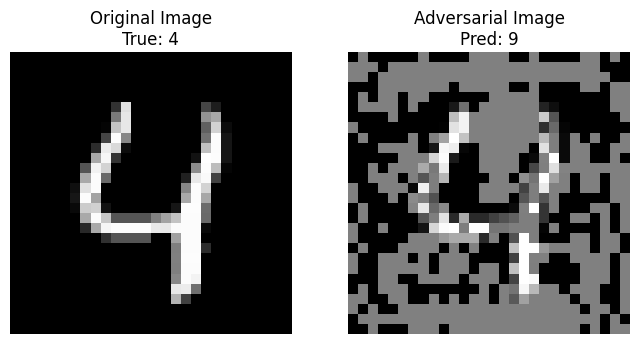

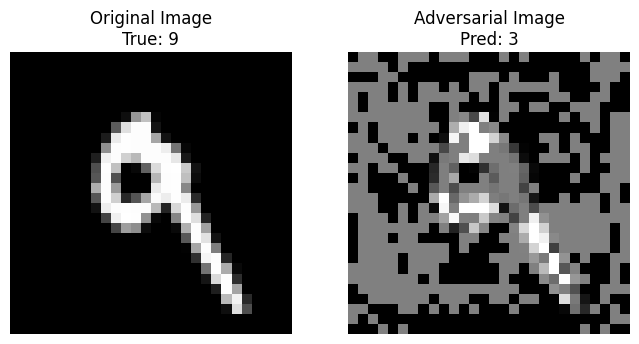

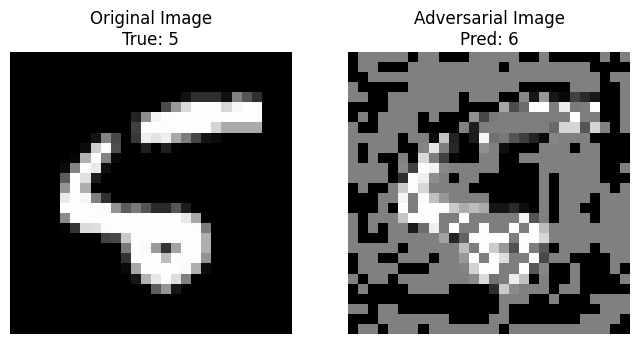

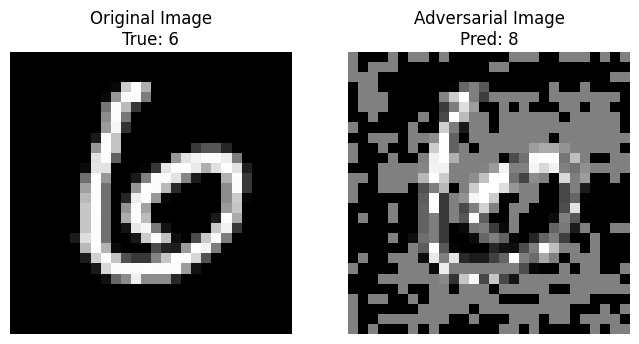

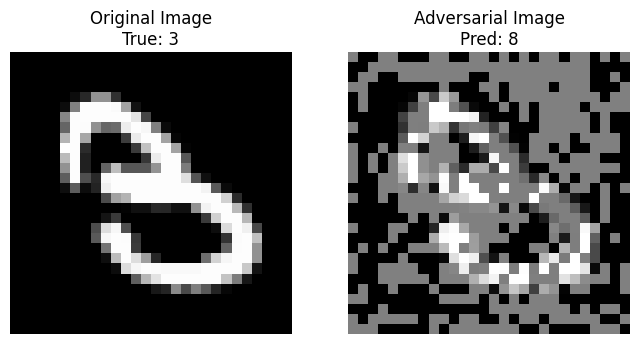

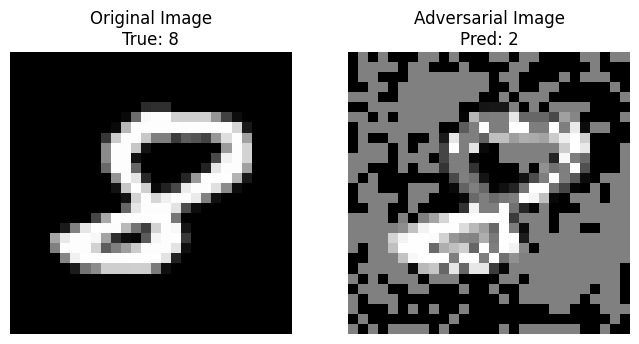

In [63]:
import matplotlib.pyplot as plt

def plot_original_and_adversarial(original_images, adversarial_images, true_labels, pred_labels):
    num_images = len(original_images)
    plt.figure(figsize=(15, 5 * num_images))
    for i in range(num_images):
      plt.figure(figsize=(8, 4))
      plt.subplot(1, 2, 1)
      image = original_images[i]
      true_label = true_labels[i]
      plt.imshow(tf.reshape(image, (28, 28)), cmap='gray')
      plt.title(f"Original Image\nTrue: {true_label}")
      plt.axis('off')
      adversary = adversarial_images[i]
      plt.subplot(1, 2, 2)
      pred_label = pred_labels[i]
      plt.imshow(tf.reshape(adversary, (28, 28)), cmap='gray')
      plt.title(f"Adversarial Image\nPred: {pred_label}")
      plt.axis('off')

      plt.show()
original_images = x_test_scaled[selected_indices].reshape(-1, 28, 28)
perturbed_images = np.array(adversarial_images)
true_labels = y_test[selected_indices]
perturbed_predictions = model.predict(perturbed_images.reshape(-1, 784))
pred_labels = np.argmax(perturbed_predictions, axis=1)

plot_original_and_adversarial(original_images,perturbed_images,true_labels,pred_labels)


In [39]:
import tensorflow as tf
import numpy as np

def PGD_attack(model, image, label, epsilon, alpha, num_iterations):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    perturbed_image = tf.identity(image)
    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(perturbed_image)
            prediction = model(perturbed_image)
            loss = tf.keras.losses.sparse_categorical_crossentropy(label, prediction)
        gradient = tape.gradient(loss, perturbed_image)
        signed_grad = tf.sign(gradient)
        perturbed_image = perturbed_image + alpha * signed_grad
        perturbed_image = tf.clip_by_value(perturbed_image, image - epsilon, image + epsilon)
        perturbed_image = tf.clip_by_value(perturbed_image, 0, 1) 

    return perturbed_image

In [49]:

eps = 0.05
a = 0.1
num_iter = 50
adversarial_images2 = []
for index in selected_indices:
    image = x_test_scaled[index]
    label = y_test[index]
    image = image.reshape(1, -1)
    perturbed_image = PGD_attack(model, image, label, eps, a, num_iter)
    adversarial_images2.append(perturbed_image)

In [57]:

eps = 0.5 
a = 0.1
num_iter = 10
adversarial_images3 = []
for index in correctly_classified_indices:
    print(index)
    image = x_test_scaled[index]
    label = y_test[index]
    image = image.reshape(1, -1)
    perturbed_image = PGD_attack(model, image, label, eps, a, num_iter)
    adversarial_images3.append(perturbed_image)
original_images = x_test_scaled[correctly_classified_indices].reshape(-1, 28, 28)
perturbed_images = np.array(adversarial_images3)
true_labels = y_test[correctly_classified_indices]
perturbed_predictions = model.predict(perturbed_images.reshape(-1, 784))
pred_labels = np.argmax(perturbed_predictions, axis=1)

Streaming output truncated to the last 5000 lines.
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4957
4958
4959
4960
4961
4962
4963
4964
4965
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136

In [58]:

wrongly_classified_count = 0
correctly_classified_count = 0
for true_label, pred_label in zip(true_labels, pred_labels):
    if true_label != pred_label:
        wrongly_classified_count += 1
    else:
        correctly_classified_count += 1
wrongly_classified_rate = wrongly_classified_count / len(true_labels)
correctly_classified_rate = correctly_classified_count / len(true_labels)

print("Rate of wrongly classified images:", wrongly_classified_rate)
print("Rate of correctly classified images:", correctly_classified_rate)

Rate of wrongly classified images: 1.0
Rate of correctly classified images: 0.0


1/1 [==============================] - 0s 24ms/step


<Figure size 1500x5000 with 0 Axes>

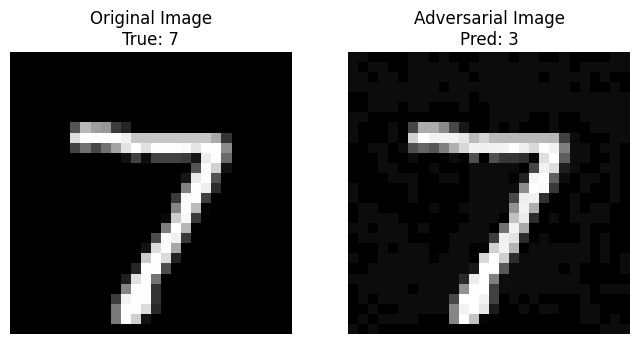

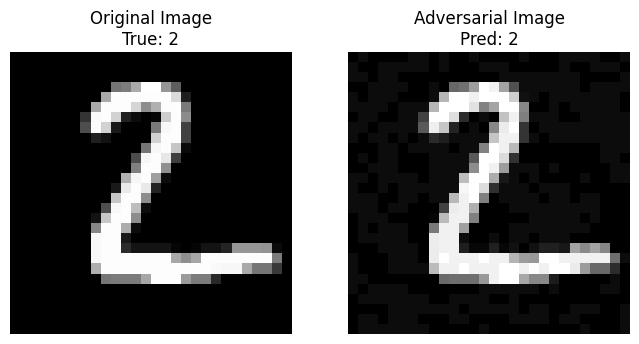

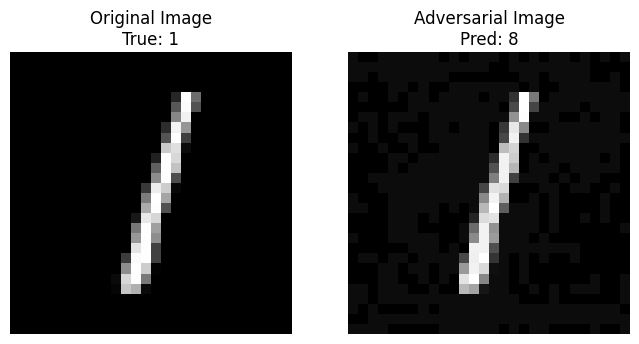

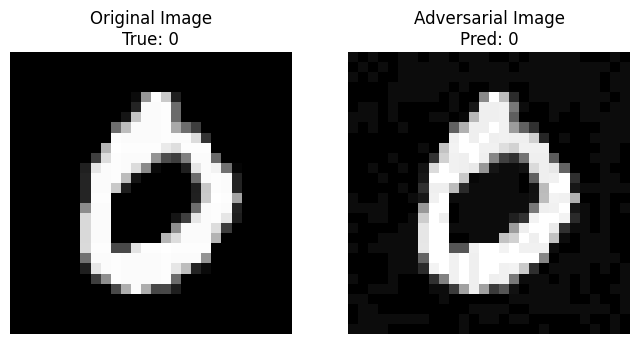

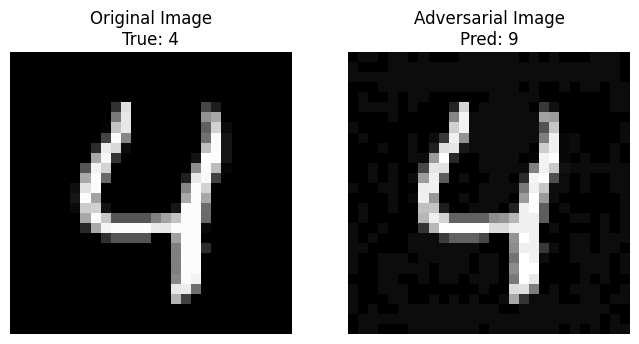

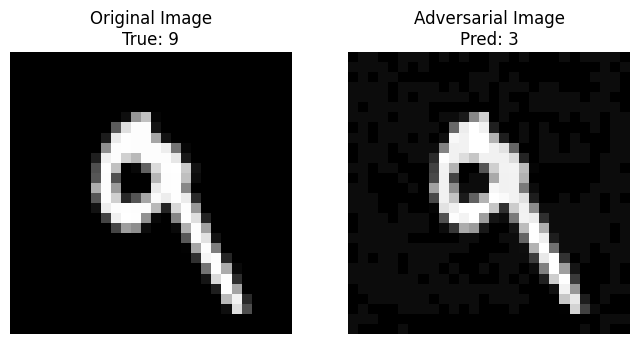

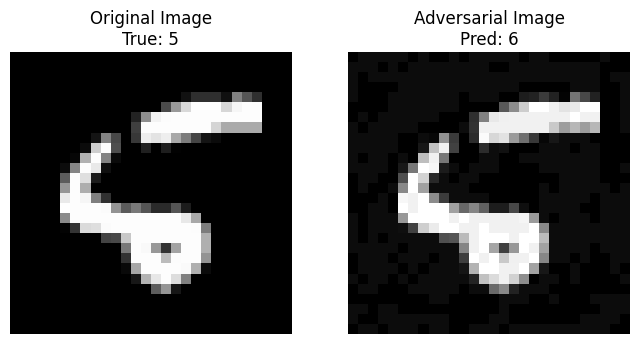

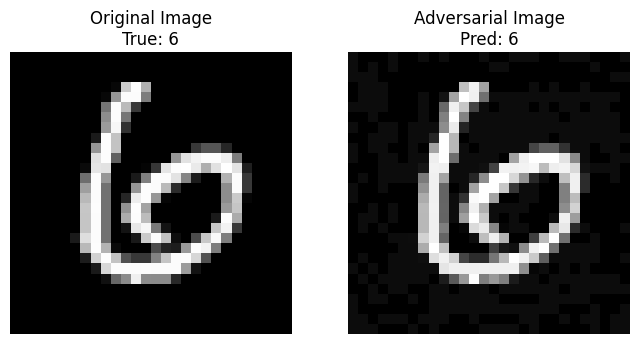

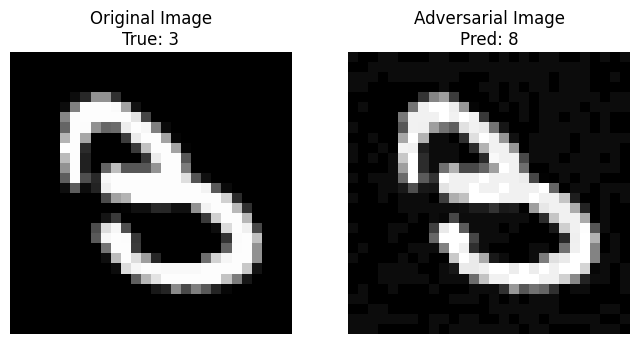

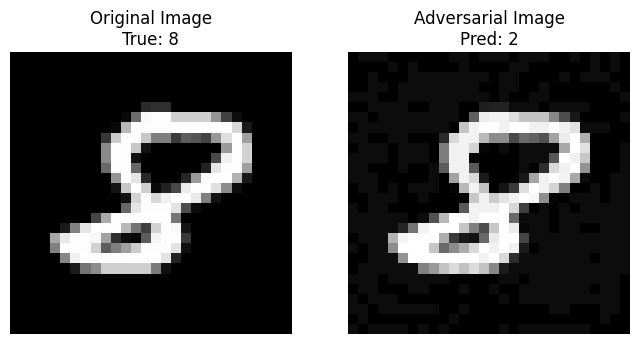

In [41]:
import matplotlib.pyplot as plt
def plot_original_and_adversarial(original_images, adversarial_images, true_labels, pred_labels):
    num_images = len(original_images)
    plt.figure(figsize=(15, 5 * num_images))
    for i in range(num_images):
      plt.figure(figsize=(8, 4))
      plt.subplot(1, 2, 1)
      image = original_images[i]
      true_label = true_labels[i]
      plt.imshow(tf.reshape(image, (28, 28)), cmap='gray')
      plt.title(f"Original Image\nTrue: {true_label}")
      plt.axis('off')
      adversary = adversarial_images[i]
      plt.subplot(1, 2, 2)
      pred_label = pred_labels[i]
      plt.imshow(tf.reshape(adversary, (28, 28)), cmap='gray')
      plt.title(f"Adversarial Image\nPred: {pred_label}")
      plt.axis('off')

      plt.show()
original_images = x_test_scaled[selected_indices].reshape(-1, 28, 28)
perturbed_images = np.array(adversarial_images2)
true_labels = y_test[selected_indices]
perturbed_predictions = model.predict(perturbed_images.reshape(-1, 784))
pred_labels = np.argmax(perturbed_predictions, axis=1)

plot_original_and_adversarial(original_images,perturbed_images,true_labels,pred_labels)